## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(mouse_metadata.head())
print(study_results.head())
print(merge_df.head())

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0
  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male   

In [2]:
# Checking the number of mice.
len(merge_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(len(merge_df))
clean_df = merge_df.drop_duplicates(subset=["Mouse ID","Timepoint"])


1893


In [4]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_df))
clean_df.head()

1888


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
gby_df = clean_df.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = gby_df.mean()["Tumor Volume (mm3)"]
median = gby_df.median()["Tumor Volume (mm3)"]
var = gby_df.var()["Tumor Volume (mm3)"]
std = gby_df.std()["Tumor Volume (mm3)"]
sem = gby_df.sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
summ_df = pd.DataFrame({
                        "Mean":mean,
                        "Median":median,
                        "Variance":var,
                        "Std Deviation":std,
                        "SEM":sem
})
summ_df




,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summ2_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean",np.median,np.var,np.std,"sem"])
summ2_df



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

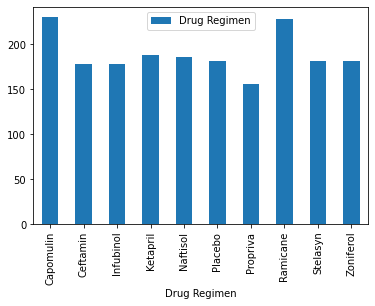

In [7]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
totals = gby_df["Drug Regimen"].count()
totals_df = pd.Series.to_frame(totals)

plotdata = pd.DataFrame({"Drug Regimen": totals_df["Drug Regimen"]})
plotdata.plot(kind="bar")


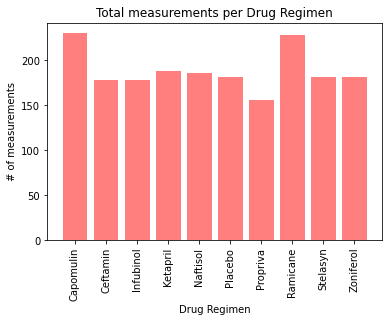

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.


x_axis = np.arange(len(totals_df))
plt.bar(x_axis, totals_df["Drug Regimen"], color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, totals_df.index.tolist(),rotation='vertical')
plt.title("Total measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of measurements")
plt.show()

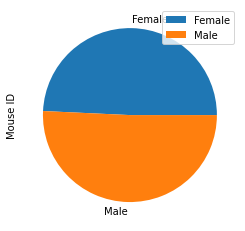

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_df.groupby(['Sex']).count().plot(kind='pie', y='Mouse ID')


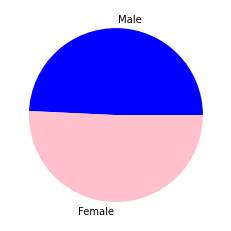

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genders = ["Male","Female"]
counts = clean_df.groupby("Sex").count()["Mouse ID"]
counts
colors = ["blue","pink"]
plt.pie(counts, labels=genders, colors=colors)
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
ms_gby = clean_df.groupby("Mouse ID")
ms_gby["Timepoint"].max()

max_tp = clean_df.loc[clean_df.groupby('Mouse ID')['Timepoint'].idxmax()][["Mouse ID", "Tumor Volume (mm3)"]]
max_tp = max_tp.rename(columns={'Tumor Volume (mm3)': 'Last Tumor Volume'})
max_tp.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge2_df = pd.merge(clean_df, max_tp, on="Mouse ID")
merge2_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Tumor Volume
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126


In [72]:
# Put treatments into a list for for loop (and later for plot labels)
treat_ls = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create list to fill with tumor vol data (for plotting)
tum_vol_df = merge2_df.loc[(merge2_df["Drug Regimen"].isin(treat_ls))]
last_tum_vol = tum_vol_df["Last Tumor Volume"]
tum_vol_df2 = tum_vol_df[["Mouse ID", "Drug Regimen","Last Tumor Volume"]]


#Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = last_tum_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")


 
    

The lower quartile is: 36.13485243
The upper quartile is: 61.43389223
The interquartile range is: 25.299039799999996
The the median is: 41.58152074 


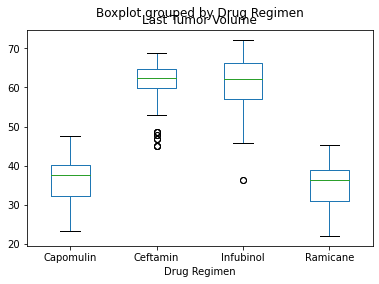

In [69]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tum_vol_df.boxplot(by ='Drug Regimen', column =['Last Tumor Volume'], grid = False) 

## Line and Scatter Plots

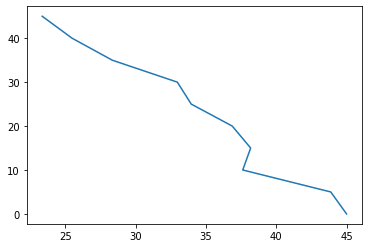

In [94]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap = tum_vol_df.loc[(tum_vol_df["Drug Regimen"] == "Capomulin") & (tum_vol_df["Mouse ID"] == "s185")]
plt.plot(cap["Tumor Volume (mm3)"],cap["Timepoint"])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

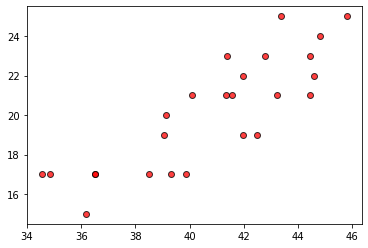

In [138]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap2 = tum_vol_df.loc[(tum_vol_df["Drug Regimen"] == "Capomulin")]
cap_gby = cap2.groupby("Mouse ID")

avg_tum_vol =cap_gby.mean()["Tumor Volume (mm3)"]
df = pd.DataFrame(avg_tum_vol)
df2 = cap2.drop_duplicates(['Mouse ID','Weight (g)'])[["Mouse ID","Weight (g)"]]
merge3_df = pd.merge(df, df2, on="Mouse ID")

plt.scatter(merge3_df["Tumor Volume (mm3)"], merge3_df["Weight (g)"], marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.show

## Correlation and Regression

In [140]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(merge3_df["Tumor Volume (mm3)"],merge3_df["Weight (g)"])


print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()



The correlation between both factors is 0.84
